In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/news.csv', error_bad_lines=False)

<ipython-input-4-26115f67dcbf>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/news.csv', error_bad_lines=False)


In [ ]:
# Drop missing values
df.dropna(inplace=True)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Preprocess text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).lower()

    # Tokenize words
    words = nltk.word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back into a string
    text = ' '.join(words)

    return text

df['text'] = df['text'].apply(preprocess_text)

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

## Next, let's train and evaluate three different models on the preprocessed data:



In [ ]:
# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print('Random Forest accuracy:', acc_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest accuracy: 0.8950276243093923
              precision    recall  f1-score   support

        FAKE       0.89      0.89      0.89       628
        REAL       0.90      0.90      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



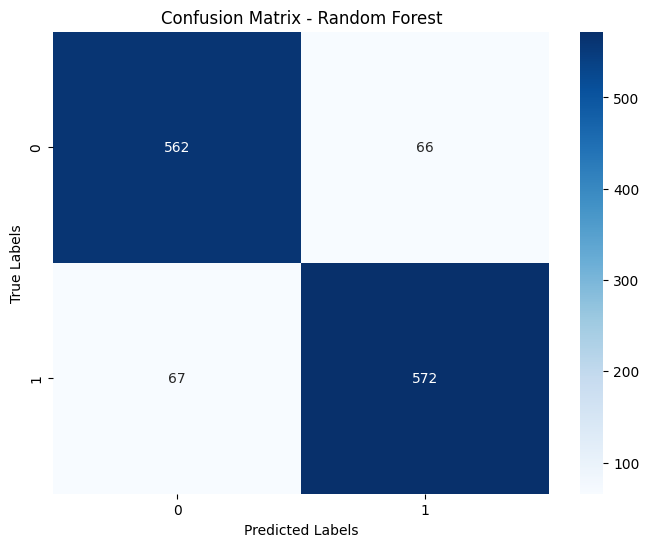

In [ ]:

cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [ ]:
# Train a SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print('SVM accuracy:', acc_svm)
print(classification_report(y_test, y_pred_svm))

SVM accuracy: 0.9337016574585635
              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.93       628
        REAL       0.94      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



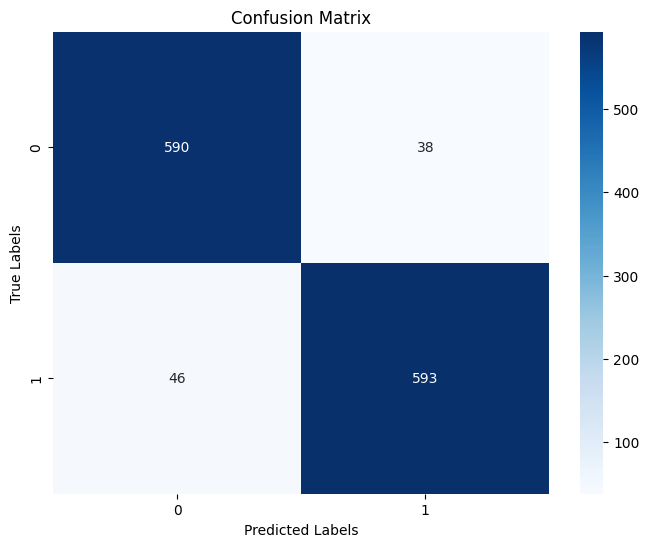

              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.93       628
        REAL       0.94      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [ ]:
cm = confusion_matrix(y_test, y_pred_svm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix_SVM')
plt.show()

In [ ]:
# Train an XGBoost model
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print('XGBoost accuracy:', acc_xgb)
print(classification_report(y_test, y_pred_xgb))

In [ ]:
# Save the model
#import pickle

#with open('xgb_model.pkl', 'wb') as f:
#    pickle.dump(xgb_model, f)

In [ ]:
#import joblib
# save the model using joblib
#joblib.dump(svm, 'svm_model.joblib')

In [ ]:
#import joblib
# save the model using joblib
#joblib.dump(xgb_model, 'xgb_model.joblib')


In [ ]:
#import shutil

# set the paths for the source and destination directories
#src_path = "/content/svm_model.joblib"
#dst_path = "/content/drive/MyDrive/svm_model.joblib"

# copy the file from source to destination
#shutil.copyfile(src_path, dst_path)


In [ ]:
# Load the model
#with open('model.pkl', 'rb') as f:
#    model = pickle.load(f)

In [ ]:
# load the model from file
#clf_loaded = joblib.load('random_forest_model.joblib')

- SVM (Linear) = 93.9%
- SVM (degree = 3) = 90%
- LogisticRegression (Linear) = 91.5%
- MultinomialNB = 87.5%
- XGBClassifier = 92%

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
print('GBM accuracy:', accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

input_dim = X_train.shape[1]

model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_train, epochs=8, batch_size=64)
model.summary()
# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)
model.save("CNNModel.h5")

Epoch 1/8
80/80 [==============================] - 6s 13ms/step - loss: 0.5214 - accuracy: 0.8696
Epoch 2/8
80/80 [==============================] - 1s 13ms/step - loss: 0.2225 - accuracy: 0.9621
Epoch 3/8
80/80 [==============================] - 1s 12ms/step - loss: 0.1081 - accuracy: 0.9856
Epoch 4/8
80/80 [==============================] - 1s 13ms/step - loss: 0.0586 - accuracy: 0.9943
Epoch 5/8
80/80 [==============================] - 1s 16ms/step - loss: 0.0349 - accuracy: 0.9976
Epoch 6/8
80/80 [==============================] - 1s 16ms/step - loss: 0.0226 - accuracy: 0.9990
Epoch 7/8
80/80 [==============================] - 1s 16ms/step - loss: 0.0157 - accuracy: 0.9996
Epoch 8/8
80/80 [==============================] - 1s 13ms/step - loss: 0.0115 - accuracy: 0.9996
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4562944  

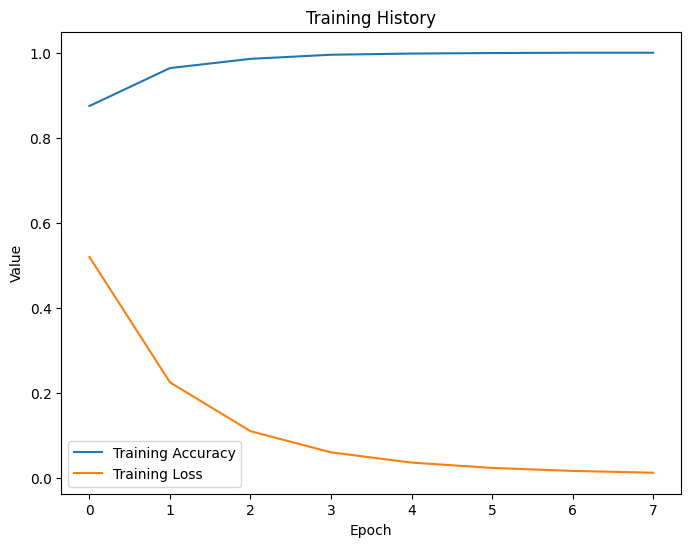

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training History')
plt.legend()
plt.show()

40/40 [==============================] - 0s 6ms/step


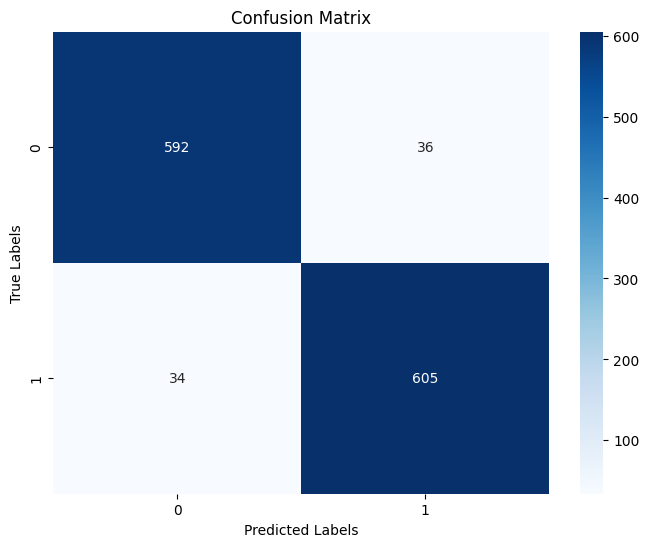

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       628
           1       0.94      0.95      0.95       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



In [ ]:
import numpy as np

# Make predictions on the test data
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))


Epoch 1/5
80/80 [==============================] - 2s 25ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1468 - val_accuracy: 0.9424
Epoch 2/5
80/80 [==============================] - 1s 17ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.1477 - val_accuracy: 0.9424
Epoch 3/5
80/80 [==============================] - 1s 17ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1485 - val_accuracy: 0.9424
Epoch 4/5
80/80 [==============================] - 1s 16ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.1494 - val_accuracy: 0.9424
Epoch 5/5
80/80 [==============================] - 1s 17ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1501 - val_accuracy: 0.9432


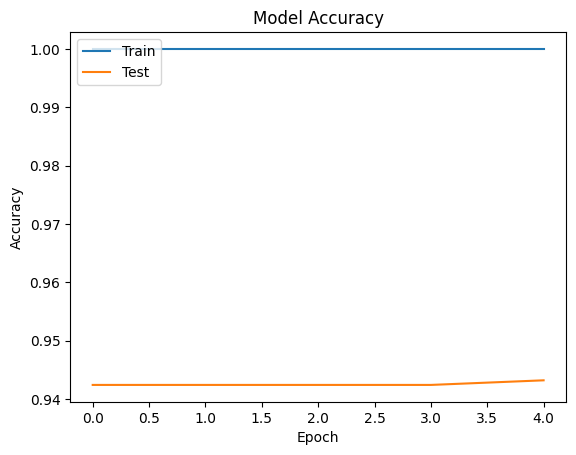

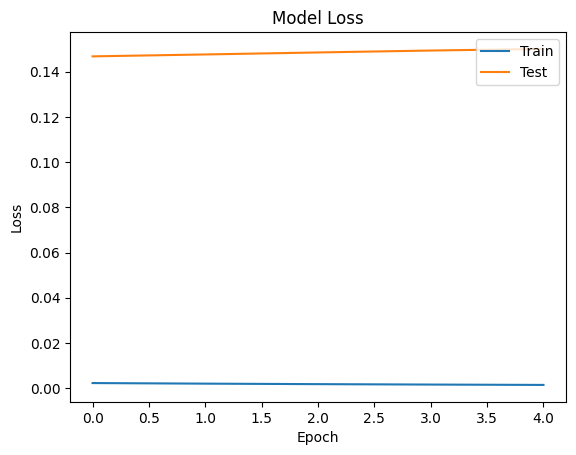

In [ ]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [ ]:
import shutil

# set the paths for the source and destination directories
src_path = "/content/CNNModel.h5"
dst_path = "/content/drive/MyDrive/CNNModel.h5"

shutil.copyfile(src_path, dst_path)


'/content/drive/MyDrive/CNNModel.h5'